In [20]:
from __future__ import division
import numpy as np

numPts = 20
controlPts = [[0, 0], [0.5, 1], [1, 0]]
t = np.array([i * 1 / numPts for i in range(0, numPts+1)])

B_x = (1-t)**2 * controlPts[0][0] + 2*(1-t)*t * controlPts[1][0] + t**2 * controlPts[2][0]
B_y = (1-t)**2 * controlPts[0][1] + 2*(1-t)*t * controlPts[1][1] + t**2 * controlPts[2][1]

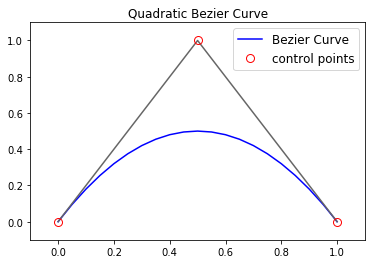

In [22]:
import matplotlib.pyplot as plt

#unzip the list
xPts, yPts = zip(*controlPts)
plt.plot(B_x, B_y, 'b', label='Bezier Curve')
plt.plot(xPts, yPts, color='#666666',)
plt.plot(xPts, yPts, 'o', mfc='none', mec='r',markersize=8, label='control points')
plt.title('Quadratic Bezier Curve')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend(loc=1, fontsize=12)
#plt.savefig('01-basic-quadratic-bezier-curve.png',dpi=100)
plt.show()

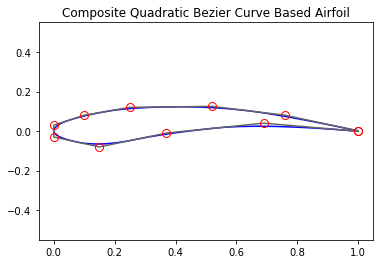

In [44]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Composite Quadratic Bezier Curve Example (Airfoil)
#   2015-08-12
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import numpy as np

#--- MAIN ---------------------------------------------------------------------+

def quadraticBezier(t,points):
    B_x=(1-t)*((1-t)*points[0][0]+t*points[1][0])+t*((1-t)*points[1][0]+t*points[2][0])
    B_y=(1-t)*((1-t)*points[0][1]+t*points[1][1])+t*((1-t)*points[1][1]+t*points[2][1])
    return B_x,B_y

def airfoil(ctlPts,numPts,write):
    curve=[]
    t=np.array([i*1/numPts for i in range(0,numPts)])
    
    # calculate first Bezier curve
    midX=(ctlPts[1][0]+ctlPts[2][0])/2
    midY=(ctlPts[1][1]+ctlPts[2][1])/2
    B_x0,B_y0=quadraticBezier(t,[ctlPts[0],ctlPts[1],[midX,midY]])
    curve=curve+list(zip(B_x0,B_y0))

    # calculate middle Bezier Curves
    for i in range(1,len(ctlPts)-3):
        p0=ctlPts[i]
        p1=ctlPts[i+1]
        p2=ctlPts[i+2]
        midX_1=(ctlPts[i][0]+ctlPts[i+1][0])/2
        midY_1=(ctlPts[i][1]+ctlPts[i+1][1])/2
        midX_2=(ctlPts[i+1][0]+ctlPts[i+2][0])/2
        midY_2=(ctlPts[i+1][1]+ctlPts[i+2][1])/2

        B_xi,B_yi=quadraticBezier(t,[[midX_1,midY_1],ctlPts[i+1],[midX_2,midY_2]])
        curve=curve+list(zip(B_xi,B_yi))                      
   
    # calculate last Bezier curve
    midX=(ctlPts[-3][0]+ctlPts[-2][0])/2
    midY=(ctlPts[-3][1]+ctlPts[-2][1])/2

    B_x1,B_y1=quadraticBezier(t,[[midX,midY],ctlPts[-2],ctlPts[-1]])
    curve=curve+list(zip(B_x1,B_y1))
    curve.append(ctlPts[-1])

    # write airfoil coordinates to text file
    if write:
        xPts,yPts=zip(*curve)
        f=open('airfoilCoords.txt','w+')
        for i in range(len(xPts)):
            f.write(str(xPts[i])+','+str(yPts[i])+'\n')
        f.close()

    return curve

#--- 11 CONTROL POINT AIRFOIL EXAMPLE -----------------------------------------+

points=[[1,0.001],              # trailing edge (top)
        [0.76,0.08],
        [0.52,0.125],
        [0.25,0.12],
        [0.1,0.08],
        [0,0.03],               # leading edge (top)
        [0,-0.03],              # leading edge (bottom)
        [0.15,-0.08],
        [0.37,-0.01],
        [0.69,0.04],
        [1,-0.001]]             # trailing edge (bottom)

#--- RUN EXAMPLE --------------------------------------------------------------+

curve=airfoil(points,16,write=True) # pick even number of points so that the leading edge is defined by a single point...

#--- PLOT ---------------------------------------------------------------------+

from pylab import *
import matplotlib.pyplot as plt

xPts,yPts=zip(*points)
xPts2,yPts2=zip(*curve)
plot(xPts2,yPts2,'b')
plot(xPts,yPts,color='#666666')
plot(xPts,yPts,'o',mfc='none',mec='r',markersize=8)
plt.title('Composite Quadratic Bezier Curve Based Airfoil')
plt.xlim(-0.05,1.05)
plt.ylim(-0.55,0.55)
##plt.savefig('airfoil-final.png',dpi=72)
plt.show()

#--- END ----------------------------------------------------------------------+

In [46]:
curve

[(1.0, 0.001),
 (0.97046874999999999, 0.010654296875),
 (0.94187500000000002, 0.019867187500000001),
 (0.91421875000000008, 0.028638671875),
 (0.88749999999999996, 0.036968750000000002),
 (0.86171875000000009, 0.044857421875000004),
 (0.83687500000000004, 0.052304687500000002),
 (0.81296875000000002, 0.059310546875000002),
 (0.79000000000000004, 0.065875000000000003),
 (0.76796874999999998, 0.071998046874999999),
 (0.74687499999999996, 0.077679687500000011),
 (0.72671874999999997, 0.082919921875000011),
 (0.70750000000000002, 0.087718750000000012),
 (0.68921874999999999, 0.092076171875000001),
 (0.671875, 0.095992187499999992),
 (0.65546874999999993, 0.099466796875000013),
 (0.64000000000000001, 0.10250000000000001),
 (0.62494140624999994, 0.10521484375),
 (0.60976562499999998, 0.10773437499999999),
 (0.59447265625000001, 0.11005859375),
 (0.57906250000000004, 0.1121875),
 (0.56353515625000006, 0.11412109375000001),
 (0.54789062499999996, 0.115859375),
 (0.53212890625000009, 0.11740234